# Problem Statement :

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

__Description of fnlwgt (final weight) :__

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Aim :

__The prediction task is to determine whether a person makes over $50K a year.__

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project

In [2]:
# Getting the dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


_Displaying the first 5 rows of our dataset, here our target is "Income"._

# Exploratory Data Analysis :

In [3]:
# Checking shape of the dataset

df.shape

(32560, 15)

_So we have 32560 rows, which is a very large number._

In [4]:
# Checking the features of the dataset

df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
# Checking datatype of the dataset

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

_Out of 15 features, 6 are object datatype and 9 are int datatype._

In [6]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


_Here we can observe that all the 32560 rows, for all the columns, are non null, that is there are no null values._

_And memory used by the dataset is 3.7+ MB._

In [7]:
# Checking for null values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

From here we are sure that there are no null values

We can also visualize and check :

In [8]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

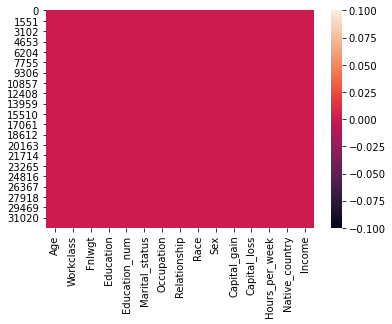

In [9]:
sns.heatmap(df.isnull())

_From the above heatmap visualization we can observe that there are no white spaces, hence no null values._

In [10]:
#Checking for unique values in each feature

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

_Here we can observe that there are some categories present in all the features._

In [11]:
# We need to know the value count of each feature :

for i in df.columns:
        print(df[i].value_counts())
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 1

_Here we can observe that, "workclass", "occupation" and "Native_country" columns has some "?" values. We need to replace them with the highest value count category._

In [12]:
df['Workclass']=df.Workclass.str.replace('?','Private')
df['Occupation'] = df.Occupation.str.replace('?','Prof-specialty')
df['Native_country']=df.Native_country.str.replace('?','United-States')

In [13]:
df.Workclass.value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [14]:
df.Occupation.value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
df.Native_country.value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

_Here we can observe that, "?" categories has been removed and added to the highest value count category._

# Exploring output variable :

In [16]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

__Visualization :__

<AxesSubplot:xlabel='Income', ylabel='count'>

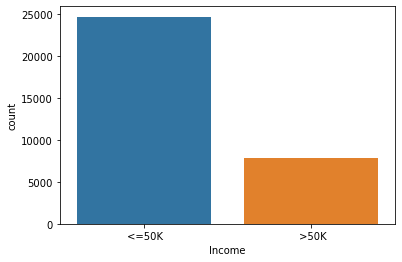

In [18]:
sns.countplot(x='Income', data=df)

__<font color=orange>Here we can highly imbalanced data in our target. This will be balanced using  SMOTE technique in the later part of the project.</font>__

# Univariate Analysis :

In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age', ylabel='Density'>

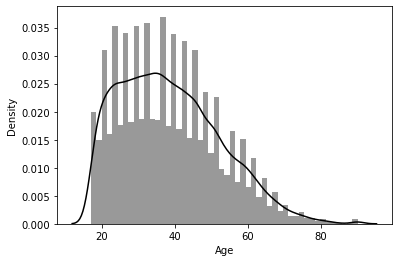

In [20]:
sns.distplot(df['Age'], color="k")

_Most of the employees are in age ranging from 22 to 42._

_And also some skewness is visible, it is right skewed._

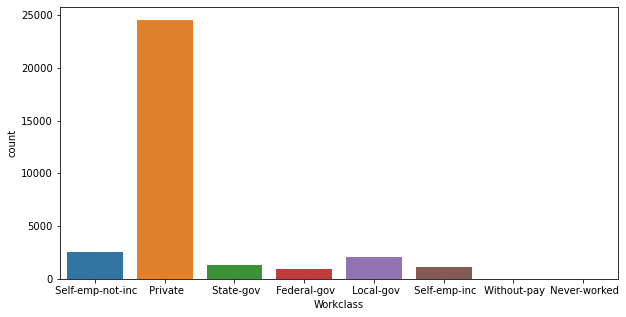

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Workclass', data=df)
plt.show()

_The employees are mostly from private sector, and all the the people are employed and working in various sectors._

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

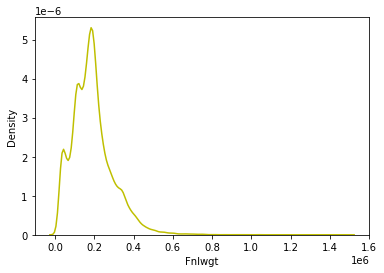

In [22]:
sns.kdeplot(df['Fnlwgt'], color="y")

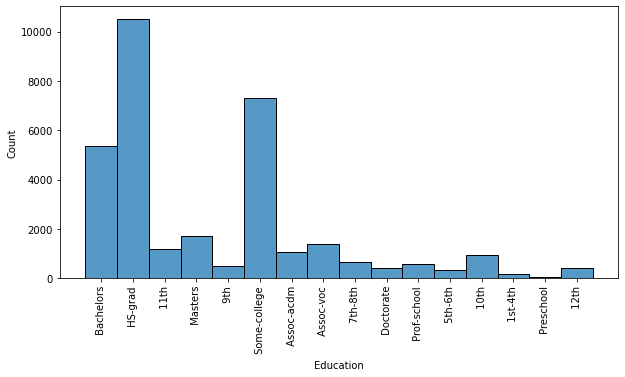

In [23]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.histplot(x='Education', data=df)
plt.show()

_So maximum employees has an education till 12th or graduation._

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

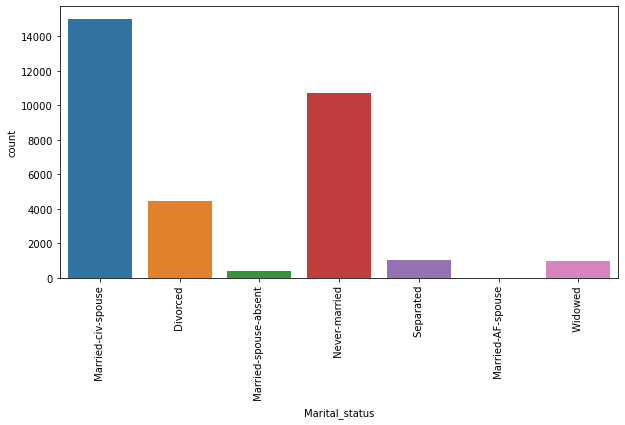

In [24]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='Marital_status', data=df)

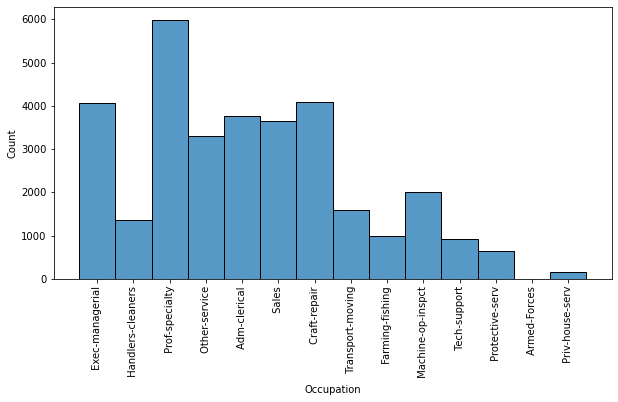

In [25]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.histplot(x='Occupation', data=df)
plt.show()

<AxesSubplot:xlabel='Relationship', ylabel='count'>

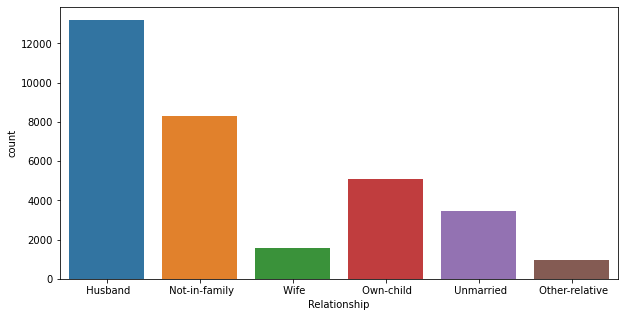

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Relationship', data=df)

<AxesSubplot:xlabel='Race', ylabel='Count'>

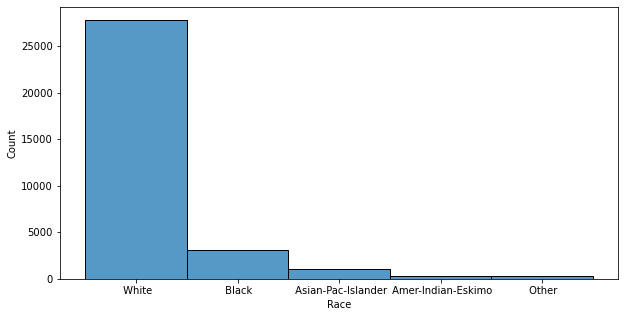

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(x='Race', data=df)

_Most of the employees are from the white race._

<AxesSubplot:xlabel='Sex', ylabel='count'>

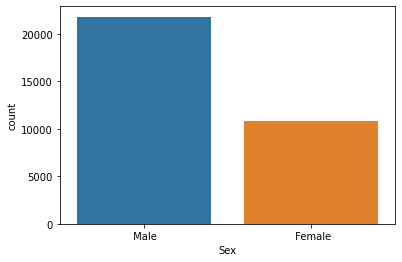

In [28]:
sns.countplot(x='Sex', data=df)

_Here we can observe that most of the employees are male._

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

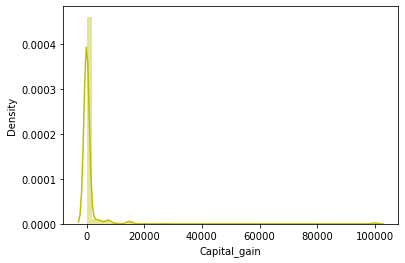

In [29]:
sns.distplot(df['Capital_gain'], color="y")

_Here capital gain is very less and the data is also right skewed._

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

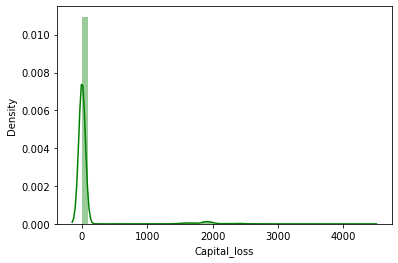

In [30]:
sns.distplot(df['Capital_loss'], color="g")

_Capital loss is also very less and right skewed too._

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

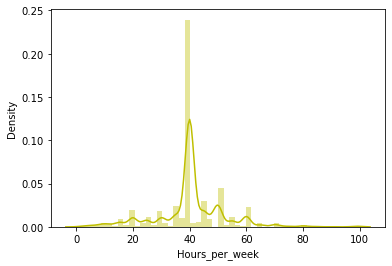

In [31]:
sns.distplot(df['Hours_per_week'], color="y")

_Employees work for 40 hours per week._

<AxesSubplot:xlabel='Native_country', ylabel='count'>

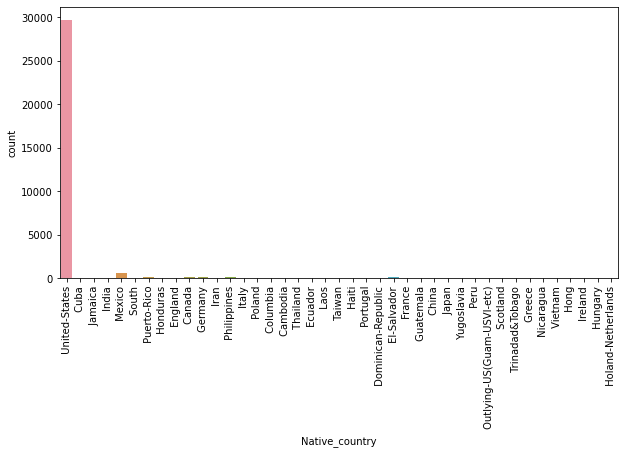

In [32]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='Native_country', data=df)

_United States has the highest employment._

# Bivariate Analysis :

<AxesSubplot:xlabel='Income', ylabel='Age'>

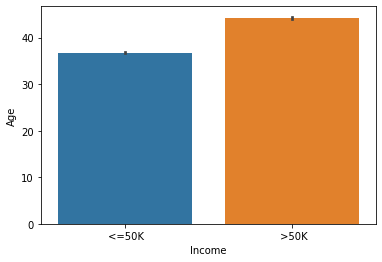

In [33]:
sns.barplot(x="Income", y="Age", data=df)

_Older and experienced employees are earning more income._

<AxesSubplot:xlabel='Workclass', ylabel='count'>

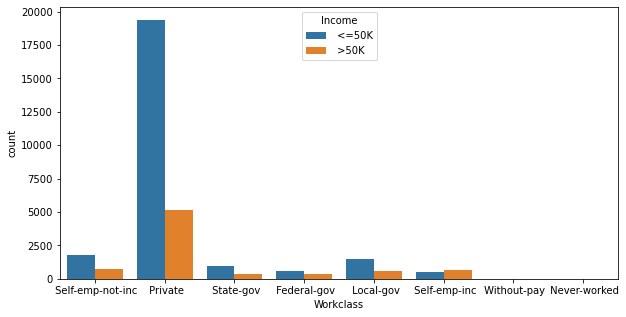

In [34]:
plt.figure(figsize=(10,5))
sns.countplot("Workclass",hue="Income",data=df)

_Employees in private sectors earns income upto 50k._

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

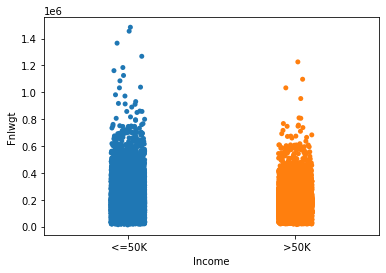

In [35]:
sns.stripplot(x='Income',y='Fnlwgt',data=df)

_Datapoints of final weight are scattered all over for income <=50K, which also signifies presence of outliers._

<AxesSubplot:xlabel='count', ylabel='Education'>

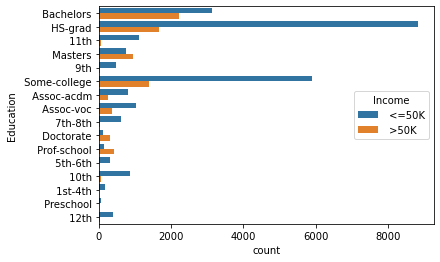

In [36]:
sns.countplot(hue='Income',y='Education',data=df)

_Employees with a bachelors degree are getting paid more than 50K._

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

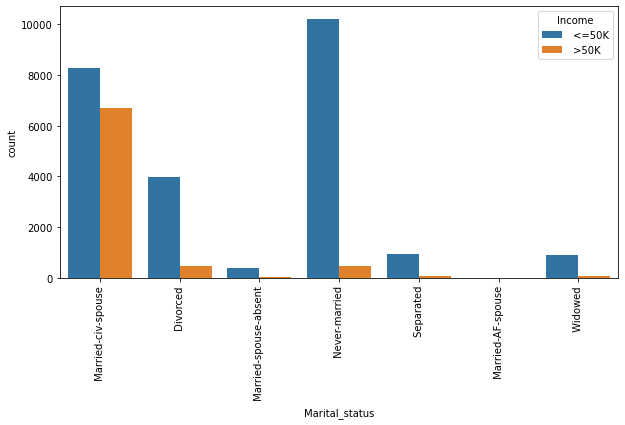

In [37]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(hue='Income',x='Marital_status',data=df)

_Married employees are having an income of more than 50K._

<AxesSubplot:xlabel='Occupation', ylabel='count'>

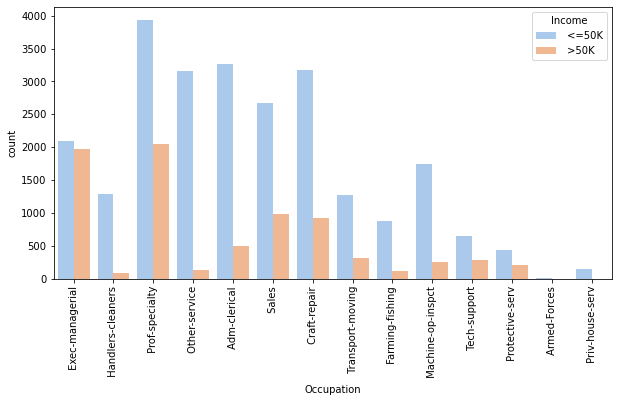

In [38]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(hue='Income',x='Occupation',data=df,palette='pastel')

_Prof-speciality and Exec-managerial are getting highly paid._

<AxesSubplot:xlabel='Relationship', ylabel='count'>

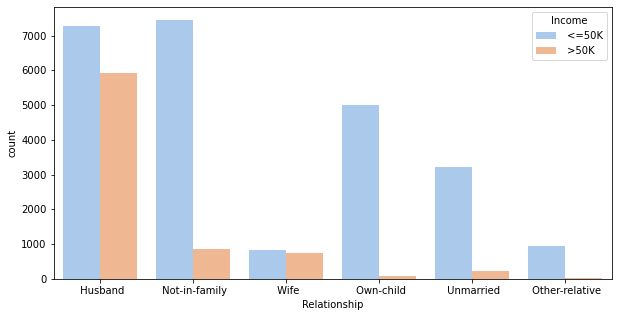

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(hue='Income',x='Relationship',data=df,palette='pastel')

_Husbands are earning more in a family._

<AxesSubplot:xlabel='Race', ylabel='count'>

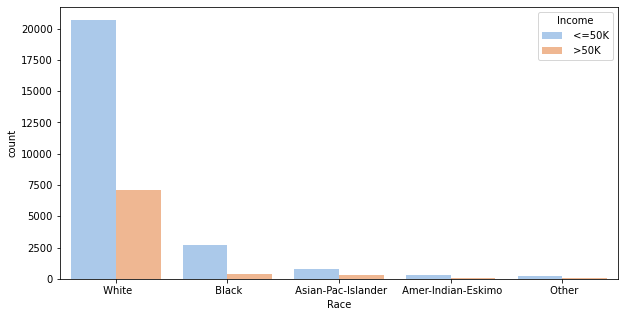

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(hue='Income',x='Race',data=df,palette='pastel')

_White people are earning more income._

<AxesSubplot:xlabel='Sex', ylabel='count'>

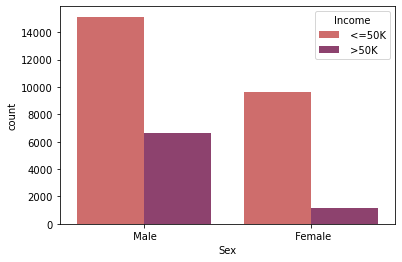

In [41]:
sns.countplot(hue='Income',x='Sex',data=df,palette='flare')

_Male employees are earning more as compared to females._

In [42]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

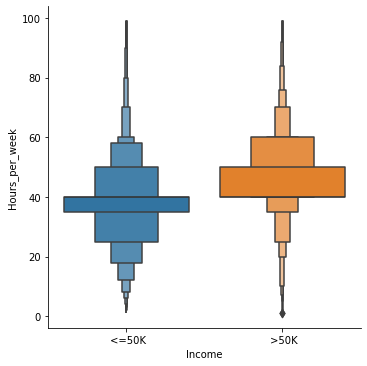

In [43]:
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='boxen')

<AxesSubplot:xlabel='Native_country', ylabel='count'>

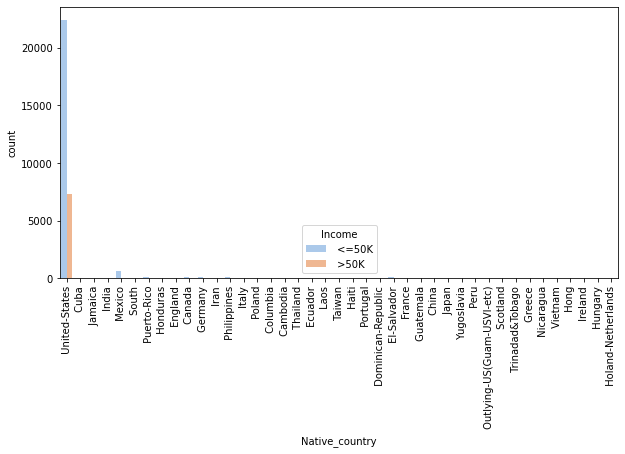

In [44]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(hue='Income',x='Native_country',data=df,palette='pastel')

_United states employees has the highest earnings._

# Label Encoding :

In [45]:
from sklearn import preprocessing

In [46]:
le = preprocessing.LabelEncoder()

In [50]:
df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])

In [51]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


_So all the features are converted into numeric form._



In [52]:
# Checking various factors of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Workclass,32560.0,3.094349,1.107094,0.0,3.0,3.0,3.0,7.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education,32560.0,10.298249,3.870317,0.0,9.0,11.0,12.0,15.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Marital_status,32560.0,2.611794,1.506225,0.0,2.0,2.0,4.0,6.0
Occupation,32560.0,6.138943,3.972623,0.0,3.0,6.0,9.0,13.0
Relationship,32560.0,1.446376,1.606794,0.0,0.0,1.0,3.0,5.0
Race,32560.0,3.665848,0.848817,0.0,4.0,4.0,4.0,4.0
Sex,32560.0,0.669195,0.470510,0.0,0.0,1.0,1.0,1.0


__Observations :__

1. Less probability for skewness because in all the features mean value is less than median.
2. Huge difference is observed between 75th percentile and max value, for the columns "Fnlwgt", "Capital_gain", "Capital_loss", which signifies presence of outliers.

In [53]:
# Checking Skewness of the dataset

df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

_The data is fairly symmetrical if the skewness is between +/-0.5._

_If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness._

_If the skewness is less than -1 or greater than 1, the data are highly skewed._

__Observations :__

1. High skewness can be observed in "Fnlwgt", "Race", "Capital_gain", "Capital_loss", "Native_country", "Income".

We can also check through visualization :

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

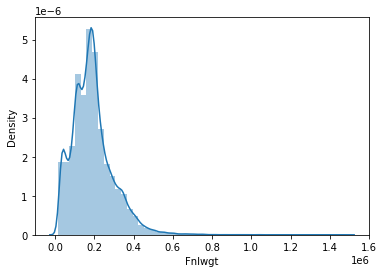

In [54]:
sns.distplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Race', ylabel='Density'>

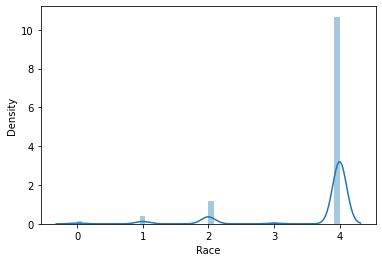

In [55]:
sns.distplot(df['Race'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

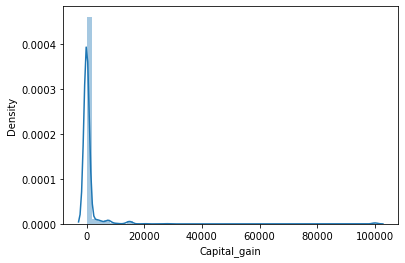

In [56]:
sns.distplot(df['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

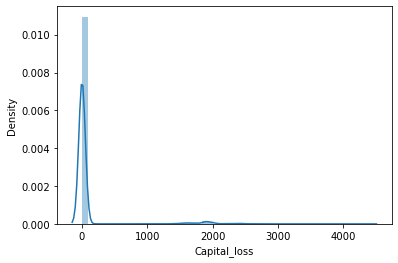

In [57]:
sns.distplot(df['Capital_loss'])

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

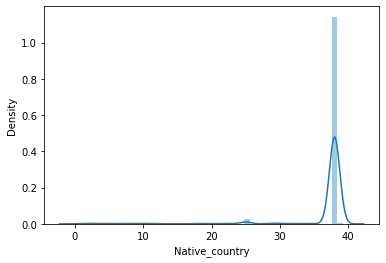

In [58]:
sns.distplot(df['Native_country'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

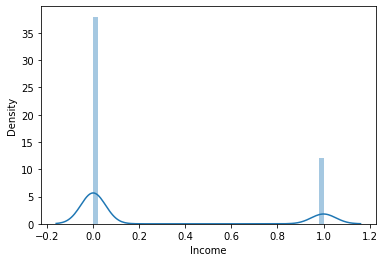

In [59]:
sns.distplot(df['Income'])

_So some of the features are right skewed and some are left skewed too._

So we need to handle these column as they are highly skewed. But before doing that we need the check the correlation of these features with our target.

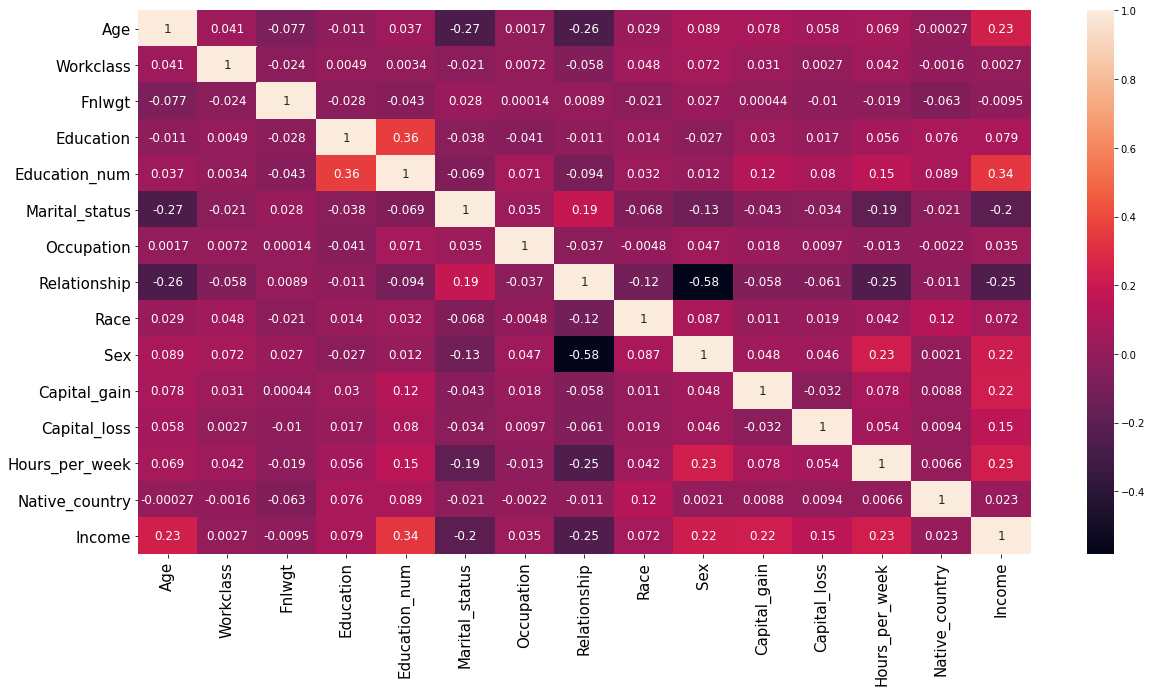

In [61]:
# Checking correlation

corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

From here we can observe that "Fnlwgt" has a negative correlation with our target, and the other highly skewed features are positively correlated, so we will first handle skewness for only "Fnlwgt", and for the rest of the features we don't need to balance their skewness, because handling its skewness will also affect its correlation.

In [63]:
import numpy as np

In [64]:
df['Fnlwgt']=np.sqrt(df['Fnlwgt'])

In [65]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             0.189066
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

# Detecting Outliers :

Age                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
Workclass         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Fnlwgt            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Education            AxesSubplot(0.125,0.593621;0.227941x0.130172)
Education_num     AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Marital_status    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Occupation           AxesSubplot(0.125,0.437414;0.227941x0.130172)
Relationship      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Race              AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Sex                  AxesSubplot(0.125,0.281207;0.227941x0.130172)
Capital_gain      AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Capital_loss      AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Hours_per_week          AxesSubplot(0.125,0.125;0.227941x0.130172)
Native_country       AxesSubplot(0.398529,0.125;0.227941x0.130172)
Income               AxesSubplot(0.672059,0.125;0.227941x0.130

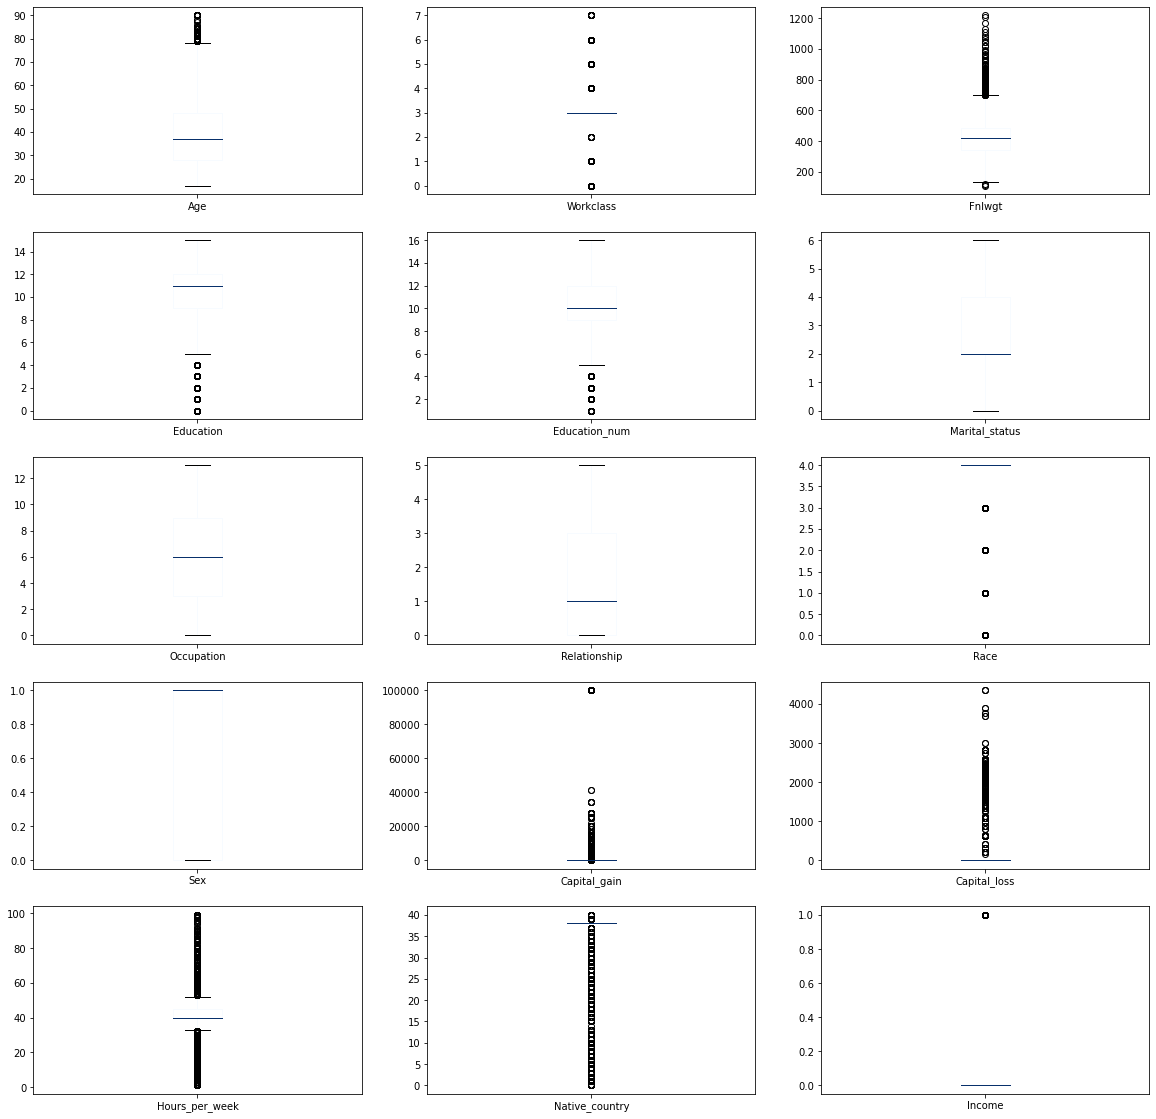

In [69]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(20,20), colormap='Blues')

Through this visualizations, the outliers are clearly visible.

And we need to remove them.

In [71]:
# Importing required zscore library

from scipy.stats import zscore

In [72]:
z=np.abs(zscore(df))

In [73]:
threshold=3

In [74]:
df_new=df[(z<3).all(axis=1)] 

In [75]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (32560, 15)


In [76]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (27958, 15)


In [77]:
# Data loss percentage

loss=((32560-27958)/32560)*100
print('Data loss percentage ',loss)

Data loss percentage  14.133906633906633


Here we can see the difference between our original df shape and df_new shape, and the percentage of data loss. Much of the outliers are removed with 14.13% and we can't afford to lose more data and will proceed further with these values.

In [85]:
df=df_new

In [86]:
df.shape

(27958, 15)

# Spliting dataframe :

In [90]:
# Data part

x=df.iloc[:,:14]
x.head(1)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,288.63645,9,13,2,3,0,4,1,0,0,13,38


In [91]:
x.shape

(27958, 14)

In [93]:
# Target column

y=df.iloc[:,14]
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int32

# Variance Inflation Factor :
__<font color=orange>It helps us to eliminate multi co-linearity.</font>__

In [94]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [96]:
vif_calc()

    VIF Factor        Features
0    10.261087             Age
1     8.783681       Workclass
2    12.884308          Fnlwgt
3     9.304124       Education
4    22.433956   Education_num
5     4.334099  Marital_status
6     3.372293      Occupation
7     2.937627    Relationship
8    36.634515            Race
9     4.554979             Sex
10    1.110995    Capital_gain
11    1.004015    Capital_loss
12   15.114396  Hours_per_week
13   86.583811  Native_country


Now, here we will find the highest values, which are 'Race' and 'Native_country'.

Now we need to check the individual impact on the target[Income], from these attributes.

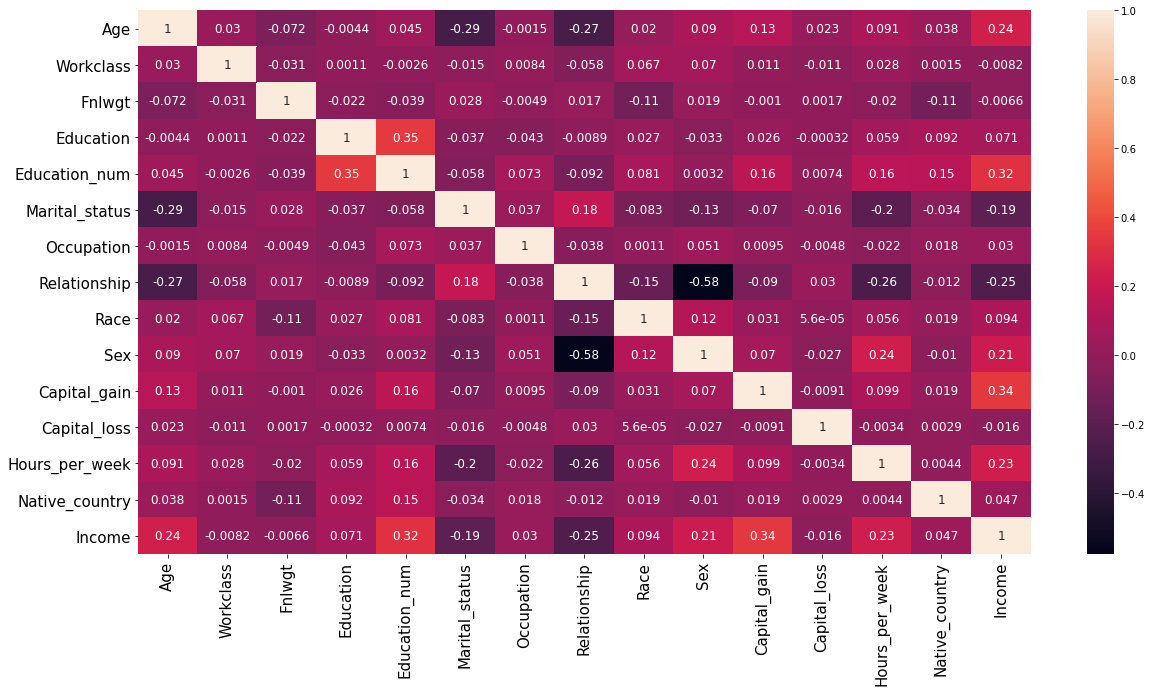

In [98]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

From here we can observe that, 'Race' and 'Native_country' are positively correlated with our target, hence no need to drop them.

# Feature Scaling :
__<font color=orange>To transform the dataset into same format, so that we have a uniform dataset.</font>__

In [99]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [100]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.886572,1.739954,-1.118907,-0.344759,1.212820,-0.404847,-0.775574,-0.914180,0.346873,0.712843,-0.245168,-0.037088,-2.417647,0.190183
1,-0.009914,-0.076096,0.394348,0.171332,-0.439396,-1.721970,-0.275326,-0.291360,0.346873,0.712843,-0.245168,-0.037088,0.006931,0.190183
2,1.110693,-0.076096,0.567451,-2.409120,-1.265504,-0.404847,-0.275326,-0.914180,-2.939989,0.712843,-0.245168,-0.037088,0.006931,0.190183
3,-0.084621,-0.076096,0.989223,0.429377,1.625874,-0.404847,-0.775574,2.199917,0.346873,-1.402833,-0.245168,-0.037088,0.006931,0.190183
4,0.811865,-0.076096,-0.157973,-1.118894,-2.091613,0.253715,0.224922,-0.291360,-2.939989,-1.402833,-0.245168,-0.037088,-2.148250,-6.317431
5,1.035986,1.739954,0.338290,0.171332,-0.439396,-0.404847,-0.775574,-0.914180,0.346873,0.712843,-0.245168,-0.037088,0.455927,0.190183
6,-0.532863,-0.076096,-1.761883,0.429377,1.625874,0.912277,0.725169,-0.291360,0.346873,-1.402833,5.782868,-0.037088,0.904923,0.190183
7,0.288915,-0.076096,-0.165921,-0.344759,1.212820,-0.404847,-0.775574,-0.914180,0.346873,0.712843,1.971047,-0.037088,0.006931,0.190183
8,-1.130520,-0.076096,-0.593328,-0.344759,1.212820,0.912277,-1.525945,0.954278,0.346873,-1.402833,-0.245168,-0.037088,-0.891061,0.190183
9,-0.458156,-0.076096,0.294578,-0.860849,0.799766,0.912277,1.225417,-0.291360,-2.939989,0.712843,-0.245168,-0.037088,0.904923,0.190183


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [101]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [102]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.929273,1.707394,-1.116575,-0.528157,1.216671,-0.406477,-0.774961,-1.064480,0.350122,0.712843,-0.296937,-0.040152,-2.237762,0.136849
1,0.118351,-0.061156,0.388849,0.000105,-0.443959,-1.718461,-0.273660,-0.013709,0.350122,0.712843,-0.296937,-0.040152,-0.040784,0.136849
2,1.108120,-0.061156,0.563301,-1.933966,-1.261872,-0.406477,-0.273660,-1.064480,-2.856913,0.712843,-0.296937,-0.040152,-0.040784,0.136849
3,0.040767,-0.061156,0.989883,0.317444,1.636095,-0.406477,-0.774961,1.662248,0.350122,-1.402833,-0.296937,-0.040152,-0.040784,0.136849
4,0.867993,-0.061156,-0.164627,-1.142106,-2.074623,0.251883,0.226650,-0.013709,-2.856913,-1.402833,-0.296937,-0.040152,-2.009409,-3.903471


# SMOTE :
To balance the categorical imbalance in target.

In [105]:
from imblearn.over_sampling import SMOTE


In [106]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [107]:
y.value_counts()

0    21687
1    21687
Name: Income, dtype: int64

Hence the target is balanced, and now we can proceed with machine learning models.

# Machine Learning Models :
Here we have a classification case, hence we'll go with Logistic Regression and various other classification models.

In [132]:
# Importing the necessary libraries :

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve 

# Spliting dataframe and finding best random state :

In [109]:
lr=LogisticRegression()

In [110]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
# predicting the x_train so that we can cross check how well the model is performing    
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train, pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test, pred_test)*100, '\n\n')

At random state 33  The model performs very well
At random_state:- 33
Training accuracy_score is:- 77.29905760972939
Testing accuracy_score is:- 77.26801152737752 


At random state 39  The model performs very well
At random_state:- 39
Training accuracy_score is:- 77.35381423095767
Testing accuracy_score is:- 77.37175792507205 


At random state 40  The model performs very well
At random_state:- 40
Training accuracy_score is:- 77.26735640796565
Testing accuracy_score is:- 77.29106628242076 


At random state 61  The model performs very well
At random_state:- 61
Training accuracy_score is:- 77.3163491743278
Testing accuracy_score is:- 77.31412103746398 


At random state 64  The model performs very well
At random_state:- 64
Training accuracy_score is:- 77.30193953716245
Testing accuracy_score is:- 77.34870317002883 


At random state 100  The model performs very well
At random_state:- 100
Training accuracy_score is:- 77.33364073892619
Testing accuracy_score is:- 77.25648414985591 


At 

So, we have found some of the good random state values with the help of Logistic Regression, and will select the one which gives highest accuracy.

39 random state with accuracy score 77.3

# Required Evaluation Metrices :

In [111]:
# Spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=39)
# Here 20% will be used for testing purpose and rest 80% for training purpose.
    

In [112]:
# First we'll create list of all the classification models to be used

models=[LogisticRegression(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        SVC(), # default kernel='rbf'
        SVC(kernel='poly')]

In [113]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7737175792507205
[[3262 1083]
 [ 880 3450]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      4345
           1       0.76      0.80      0.78      4330

    accuracy                           0.77      8675
   macro avg       0.77      0.77      0.77      8675
weighted avg       0.77      0.77      0.77      8675



Accuracy score of GaussianNB() is:
0.7662247838616715
[[2988 1357]
 [ 671 3659]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      4345
           1       0.73      0.85      0.78      4330

    accuracy                           0.77      8675
   macro avg       0.77      0.77      0.76      8675
weighted avg       0.77      0.77      0.76      8675



Accuracy score of DecisionTreeClassifier() is:
0.8576368876080691
[[3665  680]
 [ 555 3775]]
              precision    recall  f1-score   support

           0       0.87 

# Ensemble Techniques :

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [115]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score of',rfc,'is:')
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

Accuracy score of RandomForestClassifier(random_state=42) is:
0.8965994236311239
[[3800  545]
 [ 352 3978]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4345
           1       0.88      0.92      0.90      4330

    accuracy                           0.90      8675
   macro avg       0.90      0.90      0.90      8675
weighted avg       0.90      0.90      0.90      8675



In [116]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
print('Accuracy score of',adc,'is:')
print(accuracy_score(y_test,predadc))
print(confusion_matrix(y_test,predadc))
print(classification_report(y_test,predadc))

Accuracy score of AdaBoostClassifier() is:
0.844149855907781
[[3539  806]
 [ 546 3784]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4345
           1       0.82      0.87      0.85      4330

    accuracy                           0.84      8675
   macro avg       0.85      0.84      0.84      8675
weighted avg       0.85      0.84      0.84      8675



In [117]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print('Accuracy score of',gbc,'is:')
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

Accuracy score of GradientBoostingClassifier() is:
0.8612103746397695
[[3556  789]
 [ 415 3915]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4345
           1       0.83      0.90      0.87      4330

    accuracy                           0.86      8675
   macro avg       0.86      0.86      0.86      8675
weighted avg       0.86      0.86      0.86      8675



So, from above all the models, we found the highest score :
    
   __Accuracy score of RandomForestClassifier(random_state=42) is: 0.8965994236311239__

# Cross validation score for RandomForestClassifier() :

In [118]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
for i in range(2,10):
    cross=cross_val_score(rfc,x,y,cv=i)
    cvs=cross.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",cvs*100 )
    print('Accuracy score is:', acc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 88.67524323327338
Accuracy score is: 89.65994236311239


At cv:- 3
Cross validation score is:- 89.49831696407988
Accuracy score is: 89.65994236311239


At cv:- 4
Cross validation score is:- 89.76127637502678
Accuracy score is: 89.65994236311239


At cv:- 5
Cross validation score is:- 89.97562851384674
Accuracy score is: 89.65994236311239


At cv:- 6
Cross validation score is:- 90.14155945958407
Accuracy score is: 89.65994236311239


At cv:- 7
Cross validation score is:- 90.23178882851137
Accuracy score is: 89.65994236311239


At cv:- 8
Cross validation score is:- 90.20855485971295
Accuracy score is: 89.65994236311239


At cv:- 9
Cross validation score is:- 90.37711203663919
Accuracy score is: 89.65994236311239




In [119]:
score_selected= cross_val_score(rfc,x,y,cv=9).mean()
print ("The cv score is: ", score_selected, "\nThe accuracy score is: ",acc)

The cv score is:  0.903771120366392 
The accuracy score is:  0.8965994236311239


# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of RandomForestClassifier()

In [ ]:
RandomForestClassifier(n_estimators=100,
    criterion={"gini", "entropy"},
    max_features={"auto", "sqrt", "log2"},
    class_weight={"balanced", "balanced_subsample"})

_These are the some of the parameters for RandomForestClassifier(), which i found by clicking shift+tab buttons inside the function._

_First we have to create a dictionary of these parameters so that it can be passsed to the grid search function._

In [120]:
params={'n_estimators':[100],
    'criterion':["gini", "entropy"],
    'max_features':["auto", "sqrt", "log2"],
    'class_weight':["balanced", "balanced_subsample"]}

In [121]:
grid=GridSearchCV(RandomForestClassifier(), params, cv=9)

In [122]:
grid.fit(x_train,y_train)

GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [123]:
grid.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 100}

So here we have found the best parameters for our model, and now we can finally train our model.

In [124]:
RFC=RandomForestClassifier(class_weight='balanced_subsample',
                           criterion='entropy',
                           max_features='sqrt',
                           n_estimators=100)

In [125]:
RFC.fit(x_train,y_train)
RFC.score(x_train, y_train)
pred=RFC.predict(x_test)
print('Accuracy score of',RFC,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
print('\n')

Accuracy score of RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt') is:
0.8985590778097983
[[3806  539]
 [ 341 3989]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      4345
           1       0.88      0.92      0.90      4330

    accuracy                           0.90      8675
   macro avg       0.90      0.90      0.90      8675
weighted avg       0.90      0.90      0.90      8675





__<font color=orange>So, this is the best model that we have achieved.</font>__

# AUC ROC Curve :

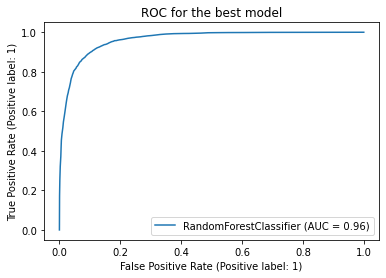

In [133]:
plot_roc_curve(RFC, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# SERIALIZATION :

In [134]:
import pickle
filename='bestcensus.pkl'
pickle.dump(RFC,open(filename,'wb'))

__<font color=orange>THANK YOU.</font>__